### Research Overview

This study aims to analyze trends in the film industry over the past four decades using the provided dataset. The analysis will encompass yearly rating trends, comparisons of ratings across genres, and identification of significant directors or actors.

#### 1. Yearly Rating Trends:
First let's look at the trend of average ratings over the last fourty years.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('IMDB_Top_Rated_Movies_Dataset.csv')

# Extract the year information
data['year_cleaned'] = data['year'].str[-4:]

# Convert 'year' column to datetime format
data['year'] = pd.to_datetime(data['year_cleaned'], format='%Y')

# Filter movies released after 1983
filtered_data = data[data['year'].dt.year > 1983]

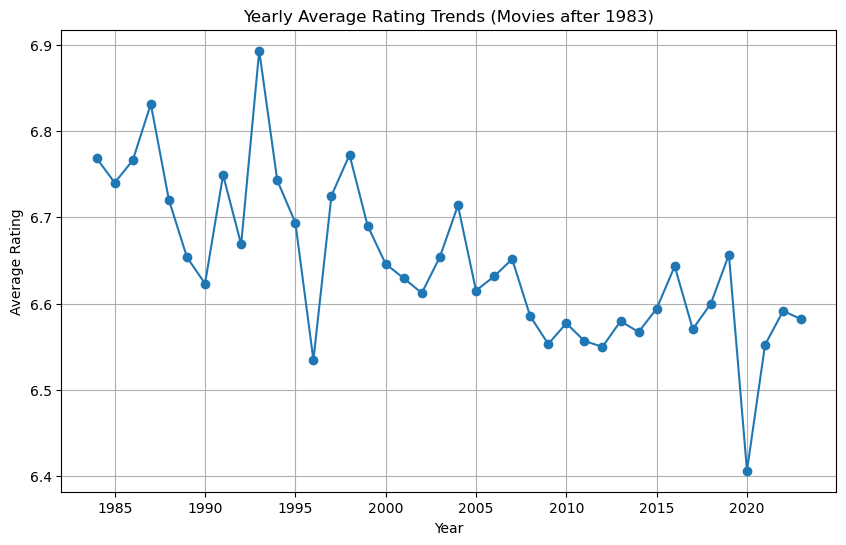

In [27]:
# Calculate the yearly average rating trends
yearly_avg_rating = filtered_data.groupby(filtered_data['year'].dt.year)['rating'].mean()

# Plotting the yearly average rating trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_rating.index, yearly_avg_rating.values, marker='o', linestyle='-')
plt.title('Yearly Average Rating Trends (Movies after 1983)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

**It can be seen that**:

1. **Overall Trends**:
   - **Late 1980s to early 1990s**: Ratings stabilized around 7 points with minimal fluctuations.
   - **Mid-1990s to early 2000s**: Ratings experienced a decline from 7 to around 6 points.
   - **Late 2000s to early 2010s**: Ratings hovered around 6 points without a clear upward or downward trend.
   - **Mid-2010s to early 2020s**: Slight increase in ratings observed, although with significant fluctuations.
   

2. **Fluctuations**:
   - **1997**: Significant peak in ratings, reaching 7.45, possibly due to the release of exceptional movies.
   - **2006 and 2008**: Notable fluctuations in ratings, possibly influenced by specific movie genres or releases.
   

3. **Long-term Trends**:
   - **Overall, movies have shown a slight decline in average ratings over the past forty years, stabilizing afterward.**
   - **Recent years have seen a slight rebound in ratings, yet still fluctuating around 6 points.**

#### 2. Rating Comparison Across Different Genres:
Comparison of mean ratings across various movie genres.

/var/folders/m8/l1x4t4d538zb5_2w0ryphgr40000gp/T/ipykernel_56524/2698217316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['main_genre'] = filtered_data['genre'].apply(lambda x: x.split(',')[0].strip())
/var/folders/m8/l1x4t4d538zb5_2w0ryphgr40000gp/T/ipykernel_56524/2698217316.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/m8/l1x4t4d538zb5_2w0ryphgr40000gp/T/ipykernel_56524/2698217316.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/m8/l1x4t4d538zb5_2w0ryphgr40000gp/T/ipykernel_56524/2698217316.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


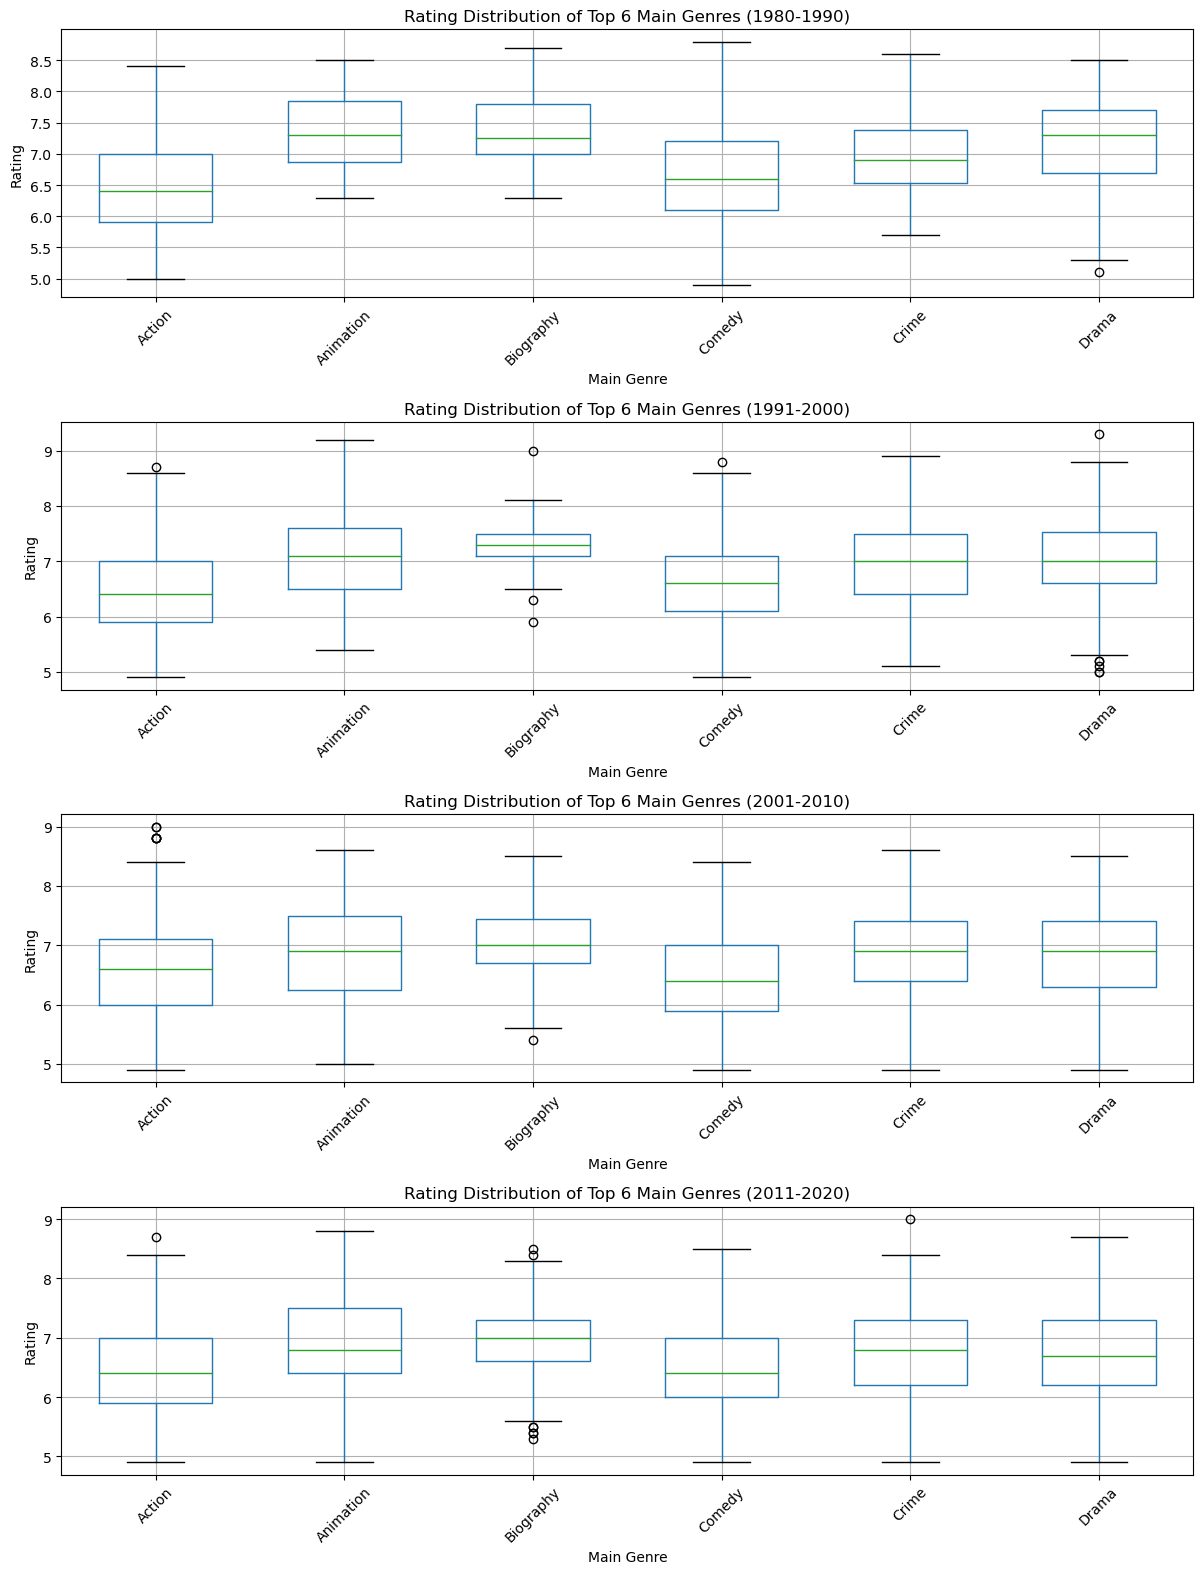

In [31]:
# Extracting primary genres
filtered_data['main_genre'] = filtered_data['genre'].apply(lambda x: x.split(',')[0].strip())

# Filtering the data for the top 6 primary genres
top_genres = filtered_data['main_genre'].value_counts().nlargest(6).index.tolist()

# Generating boxplots separated by decades
filtered_top_genres = filtered_data[filtered_data['main_genre'].isin(top_genres)]
years = filtered_years['year_cleaned'].unique()
num_plots = 4 
year_ranges = [
    (1980, 1990),
    (1991, 2000),
    (2001, 2010),
    (2011, 2020),
]

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(12, 16))

for i, ax in enumerate(axes.flatten()):
    start_year, end_year = year_ranges[i]
    year_subset = filtered_years[
        (filtered_years['year_cleaned'].astype(int) >= start_year) & 
        (filtered_years['year_cleaned'].astype(int) <= end_year)
    ]
    ax = year_subset.boxplot(column='rating', by='main_genre', ax=ax, widths=0.6, rot=90)
    ax.set_title(f'Rating Distribution of Top 6 Main Genres ({start_year}-{end_year})')
    ax.set_xlabel('Main Genre')
    ax.set_ylabel('Rating')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.suptitle('')
    plt.tight_layout()

plt.show()

In general, although there isn't a clear downward trend in average scores across the represented decades, it's evident that scores for different movie genres are declining. Notably, **Animation** and **Biography** genres consistently exhibit the highest scores, yet their declining trend is more pronounced. The **Action** genre consistently maintains lower scores, but as other genres experience a gradual decline, the variance in average scores among different genres seems to narrow, centering around a score of 6.5.

Genres such as **Action**, **Comedy**, and **Adventure** consistently showcase not only lower scores but also a broader range of scores. This suggests a wide spectrum of movie qualities within these genres. Consequently, the lower average scores in these genres might be a result of numerous low-quality movies offsetting the good ones and dragging down the overall genre scores.

This contrasts sharply with the **Biography** genre, which consistently scores highest and exhibits the smallest score range. This suggests a more consistent quality among movies in this genre.

Overall, while there's a decline in scores across genres, certain genres show more consistency in quality (like **Biography**), while others (like **Action** and **Comedy**) have a wide spectrum of movie qualities impacting their average scores.

#### 3. Influence of Directors or Actors:
Highlighting the top directors and actors with the highest average ratings.

#### Code for Directors:
Scrape the Top 25 Greatest Director of All Time list from IMDb and create a list.

In [78]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/list/ls052380992/' 

response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    director_links = soup.find_all('a', href=True)

    directors = [link.get_text(strip=True) for link in director_links if '/name/' in link['href']]

    directors_list = [] 

    for director in directors: 
        directors_list.append(director)

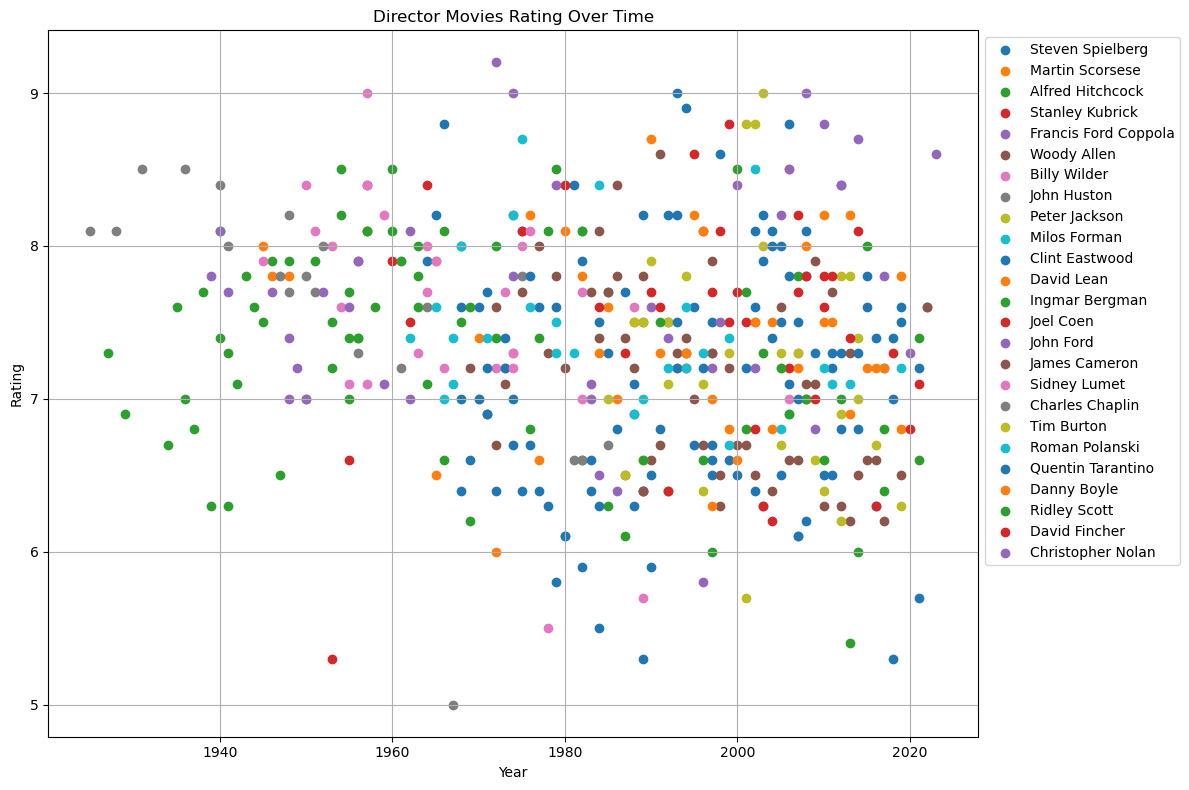

In [55]:
# Create DataFrame
df = pd.DataFrame(data)

# Extract movies directed by the directors in the given list
directors_df = df[df['director'].str.contains('|'.join(directors_list))]
directors_df

plt.figure(figsize=(12, 8))

for director in directors_list:
    director_data = directors_df[directors_df['director'].str.contains(director)]
    plt.scatter(director_data['year'], director_data['rating'], label=director)

plt.title('Director Movies Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the list of [IMDb's Greatest Directors of All Time](https://www.imdb.com/list/ls052380992/), the scatter plot doesn't seem to be a clear linear correlation between movie ratings and time. Let's try other approach.

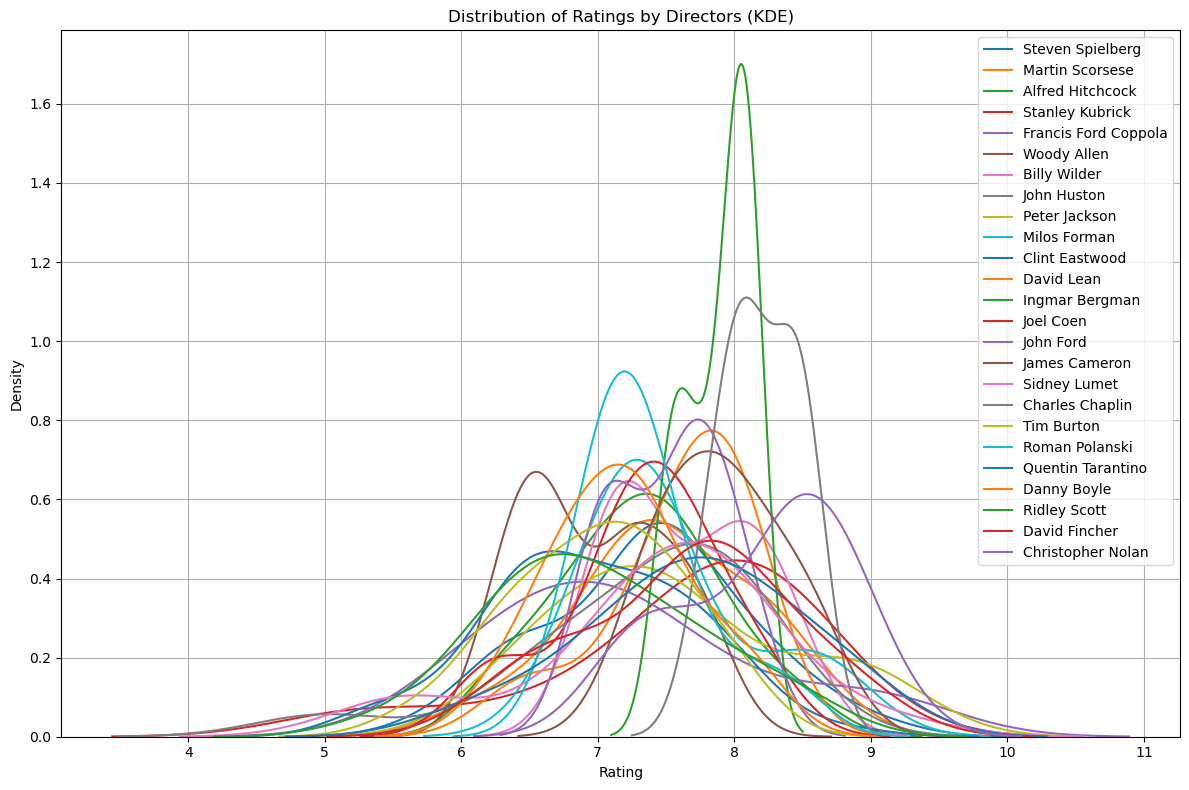

In [62]:
import seaborn as sns

plt.figure(figsize=(12, 8))

# Iterate through each director and plot a KDE graph of their movie ratings.
for director in directors_list:
    director_data = directors_df[directors_df['director'].str.contains(director)]
    sns.kdeplot(director_data['rating'], label=director)

plt.title('Distribution of Ratings by Directors (KDE)')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

When visualized in a Kernel Density Estimation (KDE) plot, the movie ratings by directors exhibit several notable patterns:

- The majority of directorial movie ratings are concentrated around 7 points, indicating a composite result of multiple factors influencing these ratings.
- Certain directors (such as Spielberg, Coppola, Kubrick, among others) consistently receive higher ratings, often surpassing the 8-point mark, possibly due to their creation of several cinematic masterpieces.
- Directorial ratings also reflect the era in which they worked. Early directors like Hitchcock, Kubrick, and Coppola tend to have higher ratings, perhaps due to lower competition in the early film industry, providing directors more opportunities to create outstanding works.

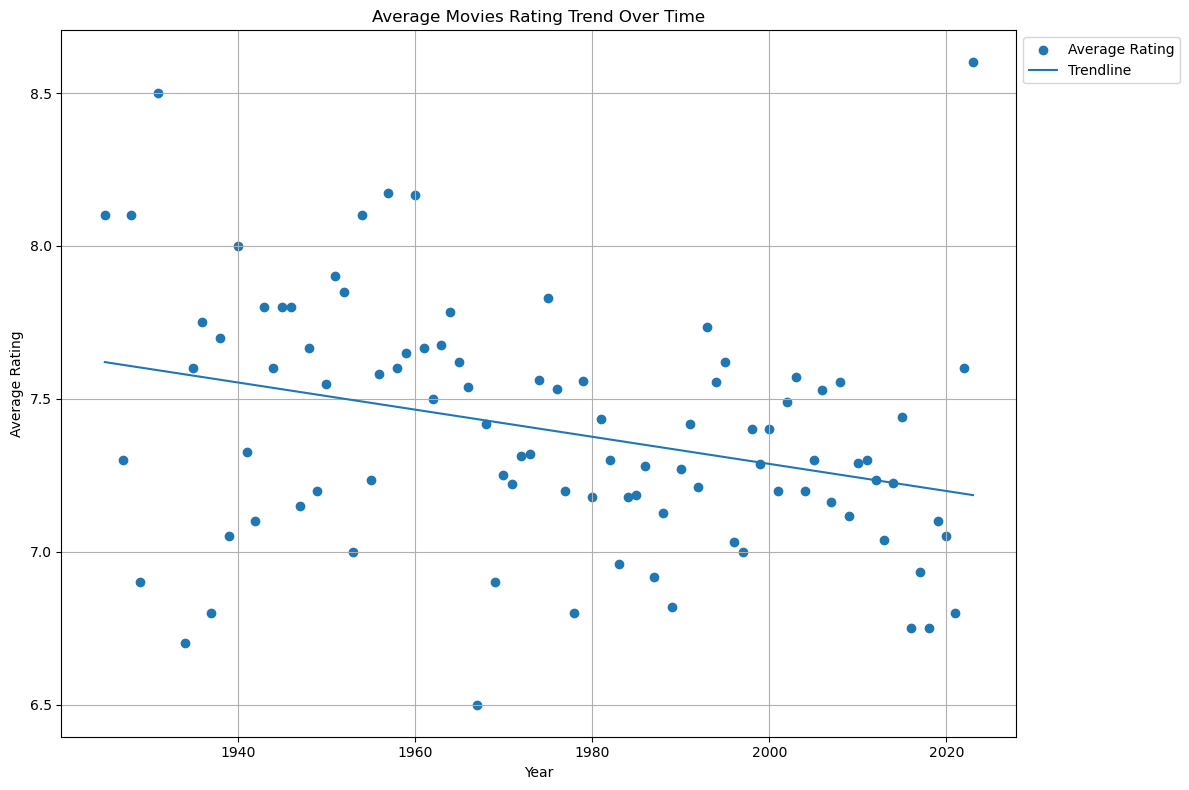

In [65]:
import numpy as np

plt.figure(figsize=(12, 8))

# Calculate the average ratings of all movies by year
average_ratings = directors_df.groupby(directors_df['year'].dt.year)['rating'].mean()

plt.scatter(average_ratings.index, average_ratings.values, label='Average Rating') 

# Polynomial fitting, using a first-order linear regression as an example.
fit = np.polyfit(average_ratings.index, average_ratings.values, 1)
fit_fn = np.poly1d(fit)

# Plotting the trend line
plt.plot(average_ratings.index, fit_fn(average_ratings.index), label='Trendline')

plt.title('Average Movies Rating Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

After calculating the average ratings of these directors' works based on their release years and adding trend lines, notable changes in the rating trends of these movies become apparent.

The graph reveals a correlation between directors' movie ratings and the year of release. In general, directors with earlier release years tend to receive higher ratings for their movies. This trend could stem from the lower technological advancements in the early film industry, presenting directors with more challenges during movie production, hence making it more difficult to create outstanding works.

However, this graph only represents statistical data and may not entirely depict the true scenario of directors' movie ratings. The specific rating of a director's work depends on various factors such as the movie's genre, themes, and style.

#### Code for Actors:
Scrape the Top 100 Greatest Actors of All Time list from IMDb and create a list.

In [75]:
url = 'https://www.imdb.com/list/ls050274118/' 

response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    actor_links = soup.find_all('a', href=True)

    actors = [link.get_text(strip=True) for link in actor_links if '/name/' in link['href']]

    for actor in actors:
        actor_list = list(actors)

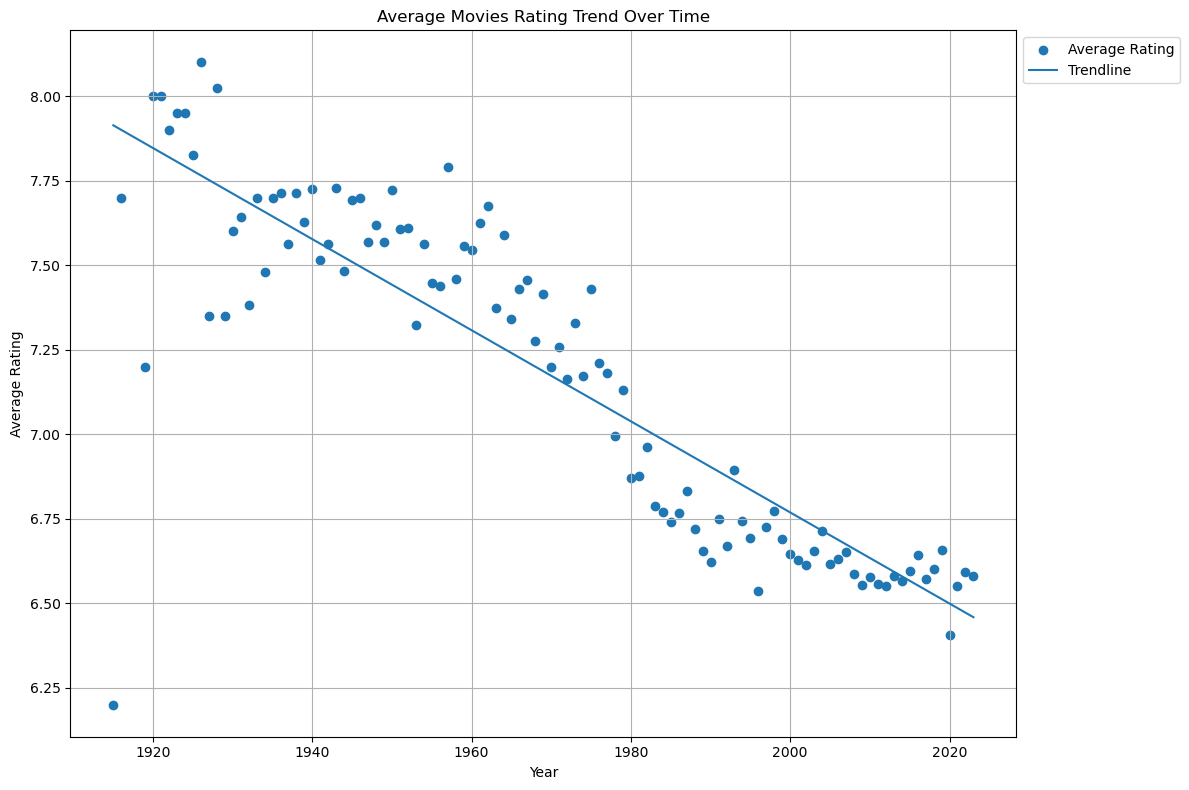

In [84]:
actor_df = df[df['stars'].str.contains('|'.join(actor_list))]
actor_df

plt.figure(figsize=(12, 8))

average_ratings = actor_df.groupby(actor_df['year'].dt.year)['rating'].mean()

plt.scatter(average_ratings.index, average_ratings.values, label='Average Rating')  

fit = np.polyfit(average_ratings.index, average_ratings.values, 1)
fit_fn = np.poly1d(fit)

plt.plot(average_ratings.index, fit_fn(average_ratings.index), label='Trendline')

plt.title('Average Movies Rating Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Drawing a scatter plot with trend lines based on the yearly average ratings of the entire filmography of the IMDb's 100 Greatest Actors of All Time list (https://www.imdb.com/list/ls050274118/) according to the previous analysis.

From the graph, it's evident that, overall, the average ratings of actors' works exhibit a clear declining trend, descending from around 8 to approximately 6.5 points.

Specifically, several notable details emerge:
- Movies from the early period (around 1920) received higher ratings, possibly because limited film production technology meant that only the most exceptional films, regarded as classics in cinematic history, were preserved and available for contemporary viewers' appreciation and evaluation.
- Post-1960, there's a marked downward trend in the average ratings of actors' works. This could be attributed to the evolution of the film industry, heightened industry competition, increasing audience sophistication, and new challenges posed to actors' performances.


### Research Conclusion

Upon analyzing the IMDb movie dataset, several overarching trends in movie ratings have been observed:

Taking a very broad view of movie quality, a rather clear downward trend in movie scores over time can be discerned. It's fair to say that this aligns with the intuition I and some movie enthusiasts around me have.

On the other hand, certain prevalent movie genres exhibit a declining trend in ratings. Notably, while Animation and Biography genres consistently present the highest ratings, their downward trend is more pronounced. On the other hand, more popular genres such as Action, Comedy, and Adventure tend to receive relatively lower scores and have a wide variation in movie quality. While the Action genre consistently maintains lower ratings, with the gradual decline in ratings across other genres, the disparity in average scores among different genres seems to be narrowing, centering around 6.5.

Furthermore, upon examining the ratings of some industry-acclaimed directors and actors, it becomes apparent that outstanding movie productions are gradually declining, leaning more towards mediocrity. It suggests a shift in the film industry dynamics, signaling a change in the quality and reception of films associated with renowned directors and actors.

In conclusion, this study confirms a long-held intuition: movies are becoming less appealing. Regarding next steps, I aim to acquire a more comprehensive dataset to conduct further analysis. I intend to address implicit biases in the research and explore the reasons behind this phenomenon.